In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Initialize the dataset
data = np.array([[0.5, 0.7], [1.0, 1.1], [1.5, 1.6], [1.1, 0.9], [1.9, 2.2], [2.2, 2.9], [2.6, 2.7], [2.0, 1.6], [2.5, 2.4], [3.1, 3.0]])
print("Original Dataset")
print(data)

Original Dataset
[[0.5 0.7]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]
 [1.9 2.2]
 [2.2 2.9]
 [2.6 2.7]
 [2.  1.6]
 [2.5 2.4]
 [3.1 3. ]]


In [3]:
# Standardize the features
sc = StandardScaler()
std_data = sc.fit_transform(data)
print("Standardized dataset")
print(std_data)

Standardized dataset
[[-1.740994   -1.506743  ]
 [-1.09136937 -1.00864614]
 [-0.44174475 -0.38602507]
 [-0.96144445 -1.25769457]
 [ 0.07795496  0.36112022]
 [ 0.46772973  1.23278973]
 [ 0.98742943  0.9837413 ]
 [ 0.20787988 -0.38602507]
 [ 0.85750451  0.61016865]
 [ 1.63705406  1.35731394]]


In [4]:
# Construct the covariance matrix
cov_mat = np.cov(std_data.T)
print("Covariance Matrix")
print(cov_mat)

Covariance Matrix
[[1.11111111 1.03831938]
 [1.03831938 1.11111111]]


In [5]:
## Obtain the eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigenvalues")
print(eigen_vals)
print("")
print("Eigenvector")
print(eigen_vecs)

Eigenvalues
[2.1494305  0.07279173]

Eigenvector
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
# Obtain the feature vector using eigenvectors
feature_vec = np.dot(std_data, eigen_vecs)
print("Feature Vector")
print(feature_vec)

Feature Vector
[[-2.29649685  0.16564047]
 [-1.48493521  0.05849416]
 [-0.58532165  0.03939976]
 [-1.56916825 -0.20948047]
 [ 0.31047304  0.20022808]
 [ 1.20244884  0.54097911]
 [ 1.39382819 -0.0026079 ]
 [-0.12596767 -0.41995421]
 [ 1.03780164 -0.17489286]
 [ 2.11733792 -0.19780613]]


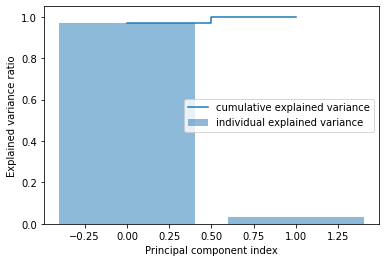

In [7]:
# Calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot explained variances
plt.bar(range(0,2), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(0,2), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# Show the ordered eigenpairs
print("Ordered Eigen pair")
print(eigen_pairs)

Ordered Eigen pair
[(2.149430495007601, array([0.70710678, 0.70710678])), (0.07279172721462168, array([-0.70710678,  0.70710678]))]


In [9]:
# Choose the eigenvector with the highest eigenvalues.
highest_value = np.hstack((eigen_pairs[0][1][:, np.newaxis]))
print('Eigenvector with the highest value')
print(highest_value)

Eigenvector with the highest value
[0.70710678 0.70710678]


In [10]:
# Obtain the 1D dataset
pca_data = std_data.dot(highest_value)
pca_data = pca_data.reshape(10, 1)
print("1D Dataset")
print(pca_data)

1D Dataset
[[-2.29649685]
 [-1.48493521]
 [-0.58532165]
 [-1.56916825]
 [ 0.31047304]
 [ 1.20244884]
 [ 1.39382819]
 [-0.12596767]
 [ 1.03780164]
 [ 2.11733792]]
